# Task: STT Speech to Text
HF definition: Automatic Speech Recognition (ASR), also known as Speech to Text (STT), is the task of transcribing a given audio to text. It has many applications, such as voice user interfaces

## Subtasks: 
* [Transcription](#transcription)
  * [Transcription using OpenAI APIs](#transcription-using-openai-apis)
  * [Transcription using Open-source options](#transcription-using-open-source-options)
    * [Transcription using Whisper](#transcription-using-whisper)
    * [Transcription using Faster whisper](#transcription-using-faster-whisper)

* [Translation](#translation)
  * [Transcription using OpenAI whisper](#translation-using-openai-whisper)
  * [Transcription using Open-source options](#translation-using-open-source-options)
    * [Transcription using Whisper](#translation-using-whisper)
    * [Transcription using Faster whisper](#translation-using-faster-whisper)
* Language detection

# Transcription

In [1]:
from carlos_tools_AV import OpenAI_transcribe, local_whisper_transcribe, local_faster_whisper_transcribe, local_detect_language
from carlos_tools_misc import clear_GPU_cache

# file_path = "media/test.wav"
# file_path = "media/Economías_criminales_el_nuevo_concepto_que_amenaza_a_la_sociedad-dtxEigxsy5s/1_Audio.mp3"
file_path= "media/000-why-Stripe.mp3"
# file_path = "Audio.wav"
runs = {}
durations = {}


d:\Users\Carlos\Documents\Code\AI_media\env\Lib\site-packages\ctranslate2\__init__.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
d:\Users\Carlos\Documents\Code\AI_media\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pygame 2.5.2 (SDL 2.28.3, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Transcription using OpenAI APIs

OpenAI guide - https://platform.openai.com/docs/guides/speech-to-text

**OpenAI gpt-4o-transcribe**

In [5]:
# Transcribe using OpenAI's GPT-4o model
model = "gpt-4o-transcribe"
response_format="text"
response = OpenAI_transcribe(
    file_path=file_path, 
    model=model, 
    response_format=response_format,
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-transcription-"+response_format
runs[index] = text
durations[index] = duration

duration = 7.70 seconds
text="Why Stripe? Well, the mission of increasing the GDP of the internet and the key role Stripe plays for small companies in particular really resonate with me, and here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some Nvidia shares, but in the long term that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in providing these businesses with trust and access to enterprise-grade financial infrastructure will be critical in this new era. In other words, we need Stripe to ensure that the benefits of AI spread across the entire econom

**OpenAI gpt-4o-mini**

In [6]:
# Transcribe using OpenAI's GPT-4o-mini model
model = "gpt-4o-mini-transcribe"
response_format="json"
response = OpenAI_transcribe(
    file_path=file_path, 
    model=model, 
    response_format=response_format,
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}") # only verbose_json  returns language
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-transcription-"+response_format
runs[index] = text
durations[index] = duration

duration = 5.32 seconds
text="Why Stripe? Well, the mission of increasing the GDP of the internet and the key role Stripe plays for small companies in particular really resonate with me. And here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some NVIDIA shares, but in the long term, that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in providing these businesses with trust and access to enterprise-grade financial infrastructure will be critical in this new era. In other words, we need Stripe to ensure that the benefits of AI spread across the entire econo

**OpenAI whisper**

**Ouput:** The format of the ouput depends on response_format

if response_format= "text", "srt", "vtt" --> str


if response_format="json", None --> Transcription object:
* text: str

if response_format="verbose_json" --> TranslationVerbose object

* duration: str - The duration of the input audio
* language: str - The language of the input translation
* text: str - The transcribed text.
* segments: Optional[List[TranscriptionSegment]] = None - Segments of the transcribed text and their corresponding details
* words: Optional[List[TranscriptionWord]] = None - Extracted words and their corresponding timestamps.

In [7]:
# Transcribe using OpenAI's Whisper-1 model
# text response format --> transctiption is a string
model = "whisper-1"
response_format="text"
response = OpenAI_transcribe(
    file_path=file_path, 
    model=model, 
    response_format=response_format,
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}") # only verbose_json  returns language
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-transcription-"+response_format
runs[index] = text
durations[index] = duration

duration = 10.54 seconds
text="Why Stripe? Well, the mission of increasing the GDP of the internet, and the key role Stripe plays for small companies in particular, really resonate with me. And here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some Nvidia shares, but in the long term, that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in providing these businesses with trust and access to enterprise-grade financial infrastructure will be critical in this new era. In other words, we need Stripe to ensure that the benefits of AI spread across the entire ec

In [8]:
# Transcribe using OpenAI's Whisper-1 model
# json response format --> transctiption is a transcription object
model = "whisper-1"
response_format="json"
response = OpenAI_transcribe(
    file_path=file_path, 
    model=model, 
    response_format=response_format,
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}") # only verbose_json  returns language
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-transcription-"+response_format
runs[index] = text
durations[index] = duration


duration = 6.82 seconds
text="Why Stripe? Well, the mission of increasing the GDP of the internet, and the key role Stripe plays for small companies in particular, really resonate with me. And here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some Nvidia shares. But in the long term, that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in providing these businesses with trust and access to enterprise-grade financial infrastructure will be critical in this new era. In other words, we need Stripe to ensure that the benefits of AI spread across the entire eco

In [9]:
# Transcribe using OpenAI's Whisper-1 model
# verbose_json response format --> transcription is verbose transcription object, which includes segments, a list of openai.types.audio.transcription_segment.TranscriptionSegment objects
model = "whisper-1"
response_format="verbose_json"
response = OpenAI_transcribe(
    file_path=file_path, 
    model=model, 
    response_format=response_format,
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}") # only verbose_json returns language
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-transcription-"+response_format
runs[index] = text
durations[index] = duration

duration = 7.08 seconds
text="Why Stripe? Well, the mission of increasing the GDP of the internet, and the key role Stripe plays for small companies in particular, really resonate with me. And here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some Nvidia shares, but in the long term, that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in providing these businesses with trust and access to enterprise-grade financial infrastructure will be critical in this new era. In other words, we need Stripe to ensure that the benefits of AI spread across the entire eco

In [10]:
# print segments - only available in verbose_json response format
if hasattr(transcription, 'segments') and transcription.segments:
    segments = transcription.segments
    for segment in segments:
        print(f"[{segment.start:.2f}s -> {segment.end:.2f}s] {segment.text}")
else:
    print("No segments available in transcription object")

[0.00s -> 1.00s]  Why Stripe?
[1.00s -> 6.64s]  Well, the mission of increasing the GDP of the internet, and the key role Stripe plays
[6.64s -> 10.30s]  for small companies in particular, really resonate with me.
[10.30s -> 12.08s]  And here is why.
[12.08s -> 16.00s]  The last several years have been all about big tech, right?
[16.00s -> 18.76s]  Particularly the largest players, the Magnificent Seven.
[18.76s -> 23.60s]  That's nice because I have some Nvidia shares, but in the long term, that kind of concentration
[23.60s -> 27.60s]  of economic growth is not good for the country or the world.
[27.60s -> 32.04s]  This is something Patrick and John Collison probably agree with because I saw them talking
[32.04s -> 34.20s]  about that in a podcast.
[34.20s -> 39.44s]  But I believe that we're entering a new era where AI will enable smaller companies and
[39.44s -> 45.84s]  startups to compete more effectively and regain their key role in the economy.
[45.84s -> 50.28s]  Stripe's role

## Transcription using Open-source options

### Transcription using Whisper

* HF https://huggingface.co/openai/whisper-large-v3
* Github https://github.com/openai/whisper
* Paper: https://arxiv.org/pdf/2212.04356
* Blog: https://openai.com/index/whisper/
* Blog: https://github.com/neobundy/Deep-Dive-Into-AI-With-MLX-PyTorch/blob/main/deep-dives/003-whisper/README.md
* Blog: https://github.com/neobundy/Deep-Dive-Into-AI-With-MLX-PyTorch/blob/main/deep-dives/003-whisper/README2.md
* Blog: https://github.com/neobundy/Deep-Dive-Into-AI-With-MLX-PyTorch/blob/main/deep-dives/003-whisper/README3.md

Whisper is  essentially a language model grounded in audio — an audio-conditional GPT.

Whisper is trained in a similar fashion to the original GPT, using self-supervised learning with a next-token prediction objective. However, while GPT is trained solely on text, Whisper is trained on paired audio and text, where the model learns to generate transcriptions (or translations) token by token from audio inputs. During training, the encoder processes the audio into latent representations, and the decoder learns to predict the next text token given the previous tokens and the audio context. Unlike GPT, which relies purely on textual continuity, Whisper must also learn alignment between speech and language, making it a multimodal model trained end-to-end on large-scale audio-text datasets.

**Input:**

Whisper's internal processing is limited to a context window of approximately 30 seconds (specifically, around 1500 frames or ~30 sec of audio at 16 kHz). For audio longer than 30 seconds, Whisper slices the audio into multiple segments.

For each initial segment of 30 secs, the original sound wave is transformed into a mel spectrogram that captures the log-scaled intensity in each of 80 mel-frequency bands, every 10 ms. Each time step is calculated by analyzing a 25 ms window of audio starting at that time step.

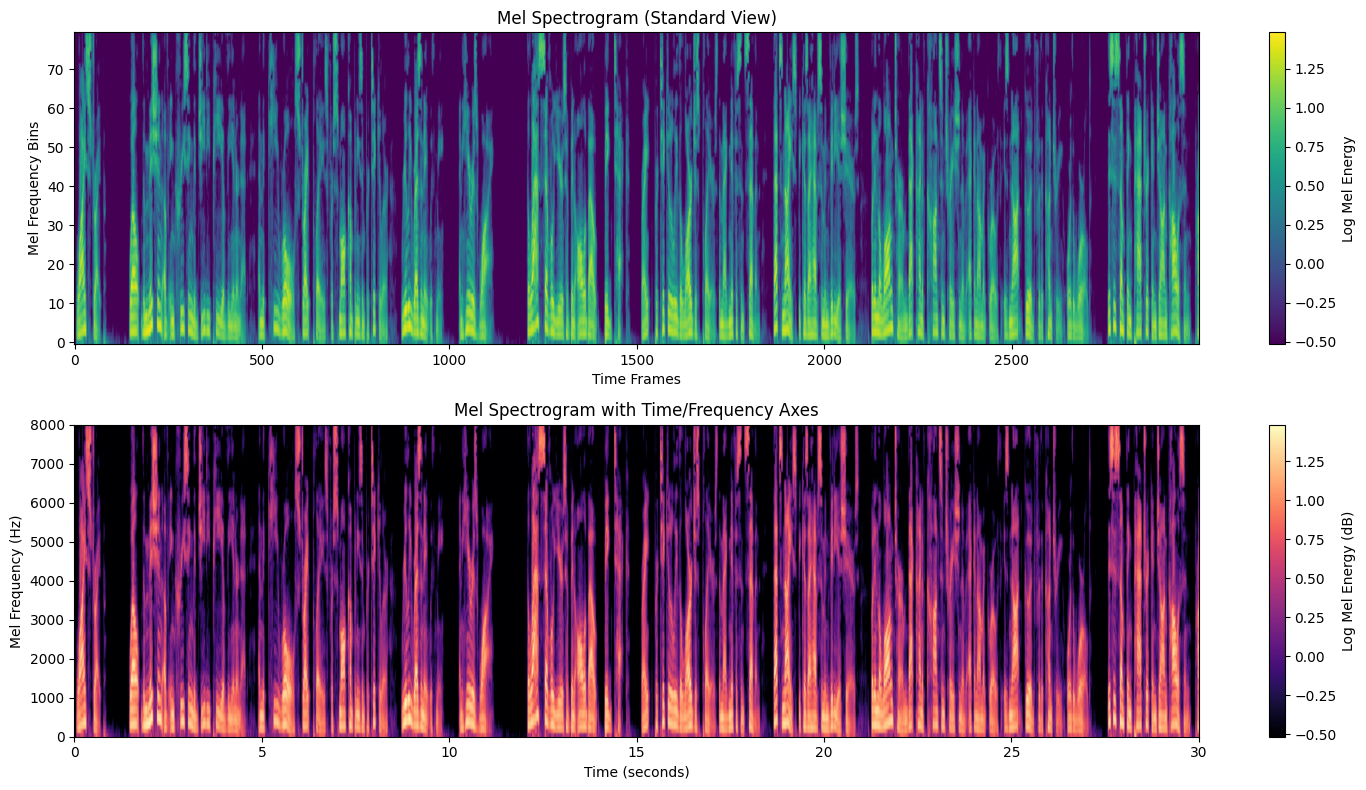

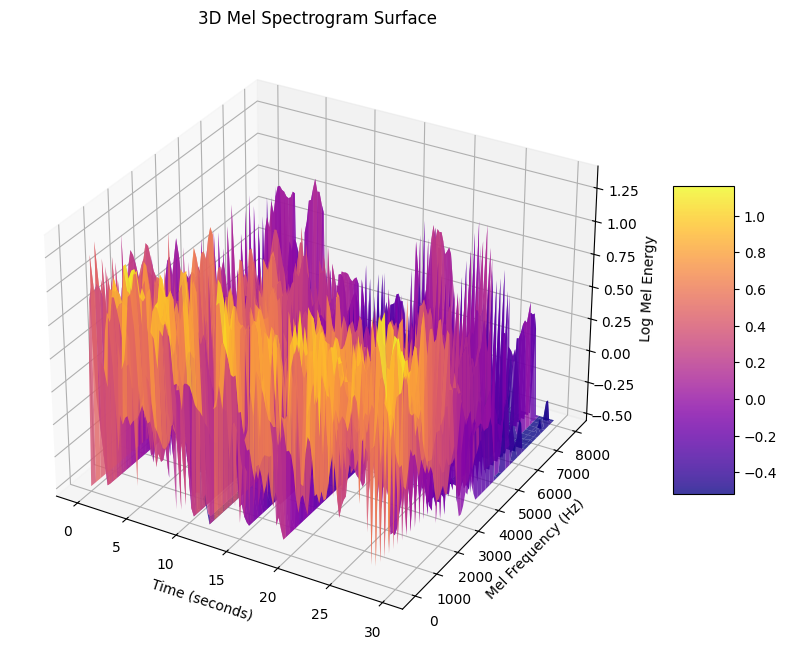

Mel spectrogram shape: (80, 3000)
Number of mel bins: 80
Number of time frames: 3000
Duration: 30.00 seconds
Min energy: -0.52 dB
Max energy: 1.48 dB


In [11]:
import whisper
import matplotlib.pyplot as plt
import numpy as np

# Load model and audio
model = whisper.load_model("base")
audio = whisper.load_audio(file_path)  # Use your existing file_path
audio = whisper.pad_or_trim(audio) # Ensure audio is the correct length

# Create mel spectrogram
mel = whisper.log_mel_spectrogram(audio, n_mels=model.dims.n_mels).to(model.device)

# Convert to numpy for visualization (move from GPU to CPU if needed)
mel_np = mel.cpu().numpy() if mel.is_cuda else mel.numpy()

# Create the visualization
plt.figure(figsize=(15, 8))

# Plot 1: Standard mel spectrogram
plt.subplot(2, 1, 1)
plt.imshow(mel_np, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Log Mel Energy')
plt.title('Mel Spectrogram (Standard View)')
plt.xlabel('Time Frames')
plt.ylabel('Mel Frequency Bins')

# Plot 2: With proper time and frequency labels
plt.subplot(2, 1, 2)
# Calculate time axis (Whisper uses 10ms hop length)
time_frames = mel_np.shape[1]
time_axis = np.linspace(0, time_frames * 0.01, time_frames)  # 10ms per frame

# Calculate mel frequency axis
n_mels = mel_np.shape[0]
mel_frequencies = np.linspace(0, 8000, n_mels)  # Approximate mel scale to 8kHz

plt.imshow(mel_np, aspect='auto', origin='lower', cmap='magma', 
           extent=[0, time_axis[-1], 0, mel_frequencies[-1]])
plt.colorbar(label='Log Mel Energy (dB)')
plt.title('Mel Spectrogram with Time/Frequency Axes')
plt.xlabel('Time (seconds)')
plt.ylabel('Mel Frequency (Hz)')

plt.tight_layout()
plt.show()

# Additional: 3D surface plot for a more dramatic visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for 3D plot
X, Y = np.meshgrid(time_axis, mel_frequencies)

# Plot surface (subsample for performance if needed)
step = max(1, mel_np.shape[1] // 100)  # Subsample time dimension if too large
surface = ax.plot_surface(X[:, ::step], Y[:, ::step], mel_np[:, ::step], 
                         cmap='plasma', alpha=0.8)

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Mel Frequency (Hz)')
ax.set_zlabel('Log Mel Energy')
ax.set_title('3D Mel Spectrogram Surface')

# Add colorbar
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()

# Print some useful information
print(f"Mel spectrogram shape: {mel_np.shape}")
print(f"Number of mel bins: {mel_np.shape[0]}")
print(f"Number of time frames: {mel_np.shape[1]}")
print(f"Duration: {time_axis[-1]:.2f} seconds")
print(f"Min energy: {mel_np.min():.2f} dB")
print(f"Max energy: {mel_np.max():.2f} dB")

**Encoding:**

The mel spectrogram is then passed through a transformer-based encoder, which begins with a few convolutional layers that reduce the time resolution and help capture local acoustic patterns. The output is a sequence of latent embeddings that represent a high-level, semantic encoding of the audio, capturing information like phonemes, words, and speaker characteristics.
The encoder is called at the beginning of the decoding process. The embeddings are stored in the audio_features tensor of dimension (1500,200). 
- 1500: Represents time steps, each corresponding to a specific short window (20ms per step), totaling about 30 seconds of audio (1500 × 20ms = 30,000ms).
- 512: Embedding dimension, indicating a high-dimensional feature vector summarizing audio characteristics at each time step.

In [12]:
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

audio_features = result.audio_features
print(f"{audio_features.shape=}")   
print(audio_features)

audio_features.shape=torch.Size([1500, 512])
tensor([[-1.0410,  0.1652, -0.6445,  ..., -0.9434,  0.9727,  0.4038],
        [ 1.1787,  0.5806,  0.0991,  ..., -0.5723,  0.7705,  0.6470],
        [ 1.2754,  0.4888, -0.3972,  ..., -0.8779,  0.2622, -0.1049],
        ...,
        [-0.6084,  0.5576,  0.2854,  ..., -0.4731,  0.0990, -0.0617],
        [-0.3850,  0.6143,  1.3848,  ..., -1.1357, -0.2280, -0.7207],
        [-0.8799,  1.0762, -0.0020,  ...,  0.2515, -0.3896, -1.1211]],
       device='cuda:0', dtype=torch.float16)


**Decoding:**

The decoder is a causal transformer that autoregressively generates text tokens, one at a time. At each step, it takes the previously generated tokens along with the encoder’s latent audio embeddings as cross-attention input. This allows the model to align the text output with the audio content, effectively translating the semantic representation of the audio into coherent transcriptions or translations in natural language.


In [13]:
print(result.text)
print(type(result))
print(f"{result.language=}")
print(f"{result.language_probs=}")
print(f"{result.tokens=}")
print(f"{result.text=}")
print(f"{result.avg_logprob=}")
print(f"{result.no_speech_prob=}")
print(f"{result.temperature=}")
print(f"{result.compression_ratio=}")

Why Stripe? Well, the mission of increasing the GDP of the internet and the key role Stripe plays for small companies in particular really resonate with me. And here is why. The last several years have been all about big tech, right? Particularly the largest players, the magnificent seven. That's nice because I have some Nvidia shares, but in the long term, that kind of concentration of economic growth is not good for the country or the world.
<class 'whisper.decoding.DecodingResult'>
result.language='en'
result.language_probs=None
result.tokens=[50364, 1545, 20390, 494, 30, 1042, 11, 264, 4447, 295, 5662, 264, 19599, 295, 264, 4705, 293, 264, 2141, 3090, 20390, 494, 50676, 50676, 5749, 337, 1359, 3431, 294, 1729, 534, 34285, 365, 385, 13, 400, 510, 307, 983, 13, 50916, 50960, 440, 1036, 2940, 924, 362, 668, 439, 466, 955, 7553, 11, 558, 30, 32281, 264, 6443, 4150, 11, 51216, 51216, 264, 23690, 3407, 13, 663, 311, 1481, 570, 286, 362, 512, 46284, 12182, 11, 457, 294, 264, 938, 1433, 11

In [14]:
clear_GPU_cache()

GPU cache cleared.


In [15]:
# Transcribe using local whisper model
model = "local-whisper"
model_size = "large-v3"
response = local_whisper_transcribe(
    file_path=file_path, 
    model_size=model_size,
    device="cuda",
    verbose=False, # Set to True for segments printed as they are processed
    prompt="",
    language=None,
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-"+model_size+"-transcription"
runs[index] = text
durations[index] = duration

# print segments - local models only
segments = transcription["segments"]
print(f"segments type: {type(segments).__name__}")
print("segments:")
for segment in segments:
    print(f"[{segment["start"]:.2f}s -> {segment["end"]:.2f}s] {segment["text"]}")


Running whisper model locally. 
file_path='media/000-why-Stripe.mp3'
 model_size='large-v3'
 device='cuda'
 verbose=False
 prompt=''
 language=None

Detected language: English


100%|██████████| 17911/17911 [01:00<00:00, 296.80frames/s]

duration = 60.92 seconds
text=" Why Stripe? Well, the mission of increasing the GDP of the internet and the key role Stripe plays for small companies in particular really resonate with me. And here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some Nvidia shares. But in the long term, that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in providing these businesses with trust and access to enterprise-grade financial infrastructure will be critical in this new era. In other words, we need Stripe to ensure that the benefits of AI spread across the entire wor

In [16]:
clear_GPU_cache()

GPU cache cleared.


Whisper large-v3-turbo is a finetuned version of a pruned Whisper large-v3 released by OpenAI in October 2024. It's the exact same model as large-v3, except that the number of decoding layers have reduced from 32 to 4. As a result, the model is way faster, at the expense of a minor quality degradation. 
It's inspired by distil-whisper, but fine-tuned with the same training data as large-v3, excluding translation data. It doesn't support translation well. Whisper in the CLI defaults to turbo.  

https://github.com/openai/whisper/discussions/2363

https://huggingface.co/openai/whisper-large-v3-turbo

In [17]:
# Transcribe using local whisper model
model = "local-whisper"
model_size = "turbo"  # large-v3-turbo is the same
response = local_whisper_transcribe(
    file_path=file_path, 
    model_size=model_size,
    device="cuda",
    verbose=False, # Set to True for segments printed as they are processed
    prompt="",
    language=None,
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-"+model_size+"-transcription"
runs[index] = text
durations[index] = duration

# print segments - local models only
segments = transcription["segments"]
print(f"segments type: {type(segments).__name__}")
print("segments:")
for segment in segments:
    print(f"[{segment["start"]:.2f}s -> {segment["end"]:.2f}s] {segment["text"]}")


Running whisper model locally. 
file_path='media/000-why-Stripe.mp3'
 model_size='turbo'
 device='cuda'
 verbose=False
 prompt=''
 language=None

Detected language: English


100%|██████████| 17911/17911 [00:08<00:00, 2122.90frames/s]

duration = 8.72 seconds
text=" why stripe well the mission of increasing the gdp of the internet and the key role stripe plays for small companies in particular really resonate with me and here is why the last several years have been all about big tech right particularly the largest players the magnificent seven that's nice because i have some nvidia shares but in the long term that kind of concentration of economic growth is not good for the country or the world this is something patrick and john collison probably agree with because i saw them talking about that in a podcast but i believe that we're entering a new era where ai will enable smaller companies and start-ups to compete more effectively and regain their key role in the economy stripe's role in providing these businesses with trust and access to enterprise grade financial infrastructure will be critical in this new era in other words we need stripe to ensure that the benefits of ai spread across the entire economy not just t

**Local Whisper Ouput:**

The output for the local whisper model is different from the OpenAI whisper API. The local model doesn't use OpenAI custom objects (e.g. transcription, TranscriptionVerbose). The transcribe function of the local whisper model outputs a dictionary containing:
* the resulting text ("text") 
* segment-level details ("segments")
* the spoken language ("language"), which is detected when `decode_options["language"]` is None.

**Segments:**

Even though the initial audio is split in 30 second chunks, the final segments are not necessarily 30 seconds long, and it's the model that determines where they start by generating special tokens as their next prediction.

The key difference between the segments initially produced by `whisper.pad_or_trim` and the segments returned by the final `transcribe` function is:

* **Initial segments (`whisper.pad_or_trim`)** are fixed-size (exactly 30 seconds or padded/truncated to fit that length). These segments are just a raw preprocessing step to feed the encoder a standard-length input.

* **Final segments (`transcribe` function outputs)** represent logically coherent segments of transcribed text, which have precise timestamps based on actual detected speech boundaries and may be shorter or differently sized based on the decoder’s output and silence detection.

* **1. Initial segments (`whisper.pad_or_trim`)**:

  * **Fixed-length segments**:

    * Always exactly 30 seconds (padded with silence if shorter, truncated if longer).
    * Ensures uniform size for encoder input.

  * **Purpose**:

    * **Standardizing inputs** to the model for consistent processing.
    * The encoder always receives inputs of shape `(80 mel bands × 1500 time-steps)`.

  * **No meaning attached to boundaries**:

    * Initial boundaries do not reflect speech or silence; they're purely based on a fixed time slice.

  * Example code: `mel_segment = whisper.pad_or_trim(mel, N_FRAMES)`

* **2. Final segments (`transcribe` function output)**:

  * **Variable-length segments**:

    * Boundaries determined by decoder output.
    * Start and end times correspond to actual detected speech segments and may vary significantly from exactly 30-second intervals.

  * **Purpose**:

    * Reflect natural speech pauses and linguistic coherence.
    * Provide meaningful, human-readable timestamps for text segments.

  * **Features**:

    * Each segment contains:

      * **Text**: actual decoded text.
      * **Timestamps**: precise start/end points relative to the original audio.
      * Metadata like tokens, average log-probability, and no-speech probability.

Example output from `transcribe()`:

```json
{
  "text":"Hello, this is Whisper. Let's test transcription.",
  "segments": [
    {
      "id": 0,
      "seek": 0,
      "start": 0.0,
      "end": 5.62,
      "text": "Hello, this is Whisper.",
      ...
    },
    {
      "id": 1,
      "seek": 281,
      "start": 5.62,
      "end": 11.30,
      "text": "Let's test transcription.",
      ...
    }
  ],
  "language": "en"
}
```

---

**Summary Table:**

| Aspect                | Initial segments (`pad_or_trim`) | Final segments (`transcribe`)      |
| --------------------- | -------------------------------- | ---------------------------------- |
| **Length**            | Fixed (30 seconds exactly)       | Variable, depending on speech      |
| **Purpose**           | Encoder input standardization    | Meaningful transcription output    |
| **Content**           | Raw Mel spectrogram segments     | Decoded textual segments           |
| **Timestamp meaning** | Arbitrary/fixed intervals        | Meaningful speech-based timestamps |
| **Generated by**      | Preprocessing (encoder stage)    | Decoder logic (output stage)       |

---

**Why the Difference?**

* **Initial segments** standardize model input to simplify computation.
* **Final segments** represent meaningful linguistic output, shaped by the decoder's speech detection and language modeling.

Thus, the difference arises from the model’s transition from fixed-size encoder inputs to semantically coherent, decoder-generated outputs.


### Transcription using Faster whisper

https://github.com/SYSTRAN/faster-whisper

**Faster-Whisper** is a high-performance, optimized implementation of OpenAI’s Whisper speech recognition model, built on top of **CTranslate2**—an efficient inference engine for transformer models.

While the original Whisper is implemented in PyTorch and designed primarily for flexibility and research, Faster-Whisper focuses on **speed and low memory usage**, making it suitable for real-time transcription and deployment on CPUs or limited GPUs.

**CTranslate2** is a C++ and Python-compatible inference engine that converts transformer models (e.g., from PyTorch or TensorFlow) into a format optimized for fast execution. It supports features like quantization (e.g., int8), multi-threading, and device-agnostic execution (CPU, GPU, Apple Silicon), enabling models like Whisper to run faster with reduced resource requirements.

In short:

* **Whisper** = accurate, full-feature ASR model in PyTorch.
* **Faster-Whisper** = same model, recompiled for speed using CTranslate2.
* **CTranslate2** = the engine that makes this optimization possible.


In [18]:
clear_GPU_cache()


GPU cache cleared.


In [19]:
# Transcribe using local faster whisper model
model = "local-faster-whisper"
model_size = "large-v3"
response = local_faster_whisper_transcribe(
    file_path=file_path, 
    model_size=model_size,
    device="cuda",
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-"+model_size+"-transcription"
runs[index] = text
durations[index] = duration

# print segments - local models only
segments = transcription["segments"]
print(f"segments type: {type(segments).__name__}")
print("segments:")
for segment in segments:
    print(f"[{segment["start"]:.2f}s -> {segment["end"]:.2f}s] {segment["text"]}")

Running faster whisper model locally. 
file_path='media/000-why-Stripe.mp3'
 model_size='large-v3'
 device='cuda'
 language=None
 prompt=None

Detected language en with probability 0.9990234375


: 

In [1]:
clear_GPU_cache()

NameError: name 'clear_GPU_cache' is not defined

In [3]:
# Transcribe using local faster whisper model
model = "local-faster-whisper"
model_size = "distil-large-v3"
response = local_faster_whisper_transcribe(
    file_path=file_path, 
    model_size=model_size,
    device="cuda",
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-"+model_size+"-transcription"
runs[index] = text
durations[index] = duration

# print segments - local models only
segments = transcription["segments"]
print(f"segments type: {type(segments).__name__}")
print("segments:")
for segment in segments:
    print(f"[{segment["start"]:.2f}s -> {segment["end"]:.2f}s] {segment["text"]}")

Running faster whisper model locally. 
file_path='media/000-why-Stripe.mp3'
 model_size='distil-large-v3'
 device='cuda'
 language=None
 prompt=None

Detected language en with probability 0.9990234375
duration = 12.91 seconds
text=" Why Stripe? Well, the mission of increasing the GDP of the Internet and the key role Stripe plays for small companies in particular really resonate with me, and here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some Nvidia shares, but in the long term, that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in providing these busi

In [4]:
clear_GPU_cache()

GPU cache cleared.


In [5]:
# Transcribe using local faster whisper model with turbo
model_size = "deepdml/faster-whisper-large-v3-turbo-ct2"
response = local_faster_whisper_transcribe(
    file_path=file_path, 
    model_size=model_size,
    device="cuda",
    )
text:str = response["text"]
language:str = response["language"]
transcription:any = response["transcription"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{transcription=}")
print(f"transcription type: {type(transcription).__name__}")
index=model+"-"+model_size+"-transcription"
runs[index] = text
durations[index] = duration

# print segments - local models only
segments = transcription["segments"]
print(f"segments type: {type(segments).__name__}")
print("segments:")
for segment in segments:
    print(f"[{segment["start"]:.2f}s -> {segment["end"]:.2f}s] {segment["text"]}")

Running faster whisper model locally. 
file_path='media/000-why-Stripe.mp3'
 model_size='deepdml/faster-whisper-large-v3-turbo-ct2'
 device='cuda'
 language=None
 prompt=None

Detected language en with probability 1.0
duration = 4.29 seconds
text=" Why Stripe? Well, the mission of increasing the GDP of the internet and the key role Stripe plays for small companies in particular really resonate with me, and here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some Nvidia shares, but in the long term, that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in prov

* **Faster whisper Output** 

* -> Tuple[Iterable[Segment], TranscriptionInfo]:

* class Segment(NamedTuple):
    * id: int
    * seek: int
    * start: float
    * end: float
    * text: str
    * tokens: List[int]
    * temperature: float
    * avg_logprob: float
    * compression_ratio: float
    * no_speech_prob: float
    * words: Optional[List[Word]]

* class TranscriptionInfo(NamedTuple):
    * language: str
    * language_probability: float
    * duration: float
    * duration_after_vad: float
    * all_language_probs: Optional[List[Tuple[str, float]]]
    * transcription_options: TranscriptionOptions
    * vad_options: VadOptions

# Language detection using local whisper

Detect language with local open source whisper

In [2]:
# Detect language using local whisper model
result = local_detect_language(
    file_path,
    device="cuda",
    )
language = result["language"]
probability = result["probability"]
all_probabilities = result["all_probabilities"]
print(f"Detected language: {language} with probability {probability:.2f}")
print("All probabilities:")
for lang, prob in all_probabilities.items():
    print(f"{lang}: {prob:.2f}", end=" ")


Detected language: en with probability 1.00
All probabilities:
yi: 0.00 af: 0.00 mn: 0.00 de: 0.00 fo: 0.00 bg: 0.00 hu: 0.00 kk: 0.00 it: 0.00 br: 0.00 ko: 0.00 yo: 0.00 ne: 0.00 tk: 0.00 el: 0.00 fa: 0.00 no: 0.00 sa: 0.00 lo: 0.00 ln: 0.00 lv: 0.00 la: 0.00 ka: 0.00 sd: 0.00 so: 0.00 sw: 0.00 eu: 0.00 cs: 0.00 te: 0.00 oc: 0.00 mk: 0.00 ta: 0.00 ps: 0.00 as: 0.00 sq: 0.00 mt: 0.00 fr: 0.00 bn: 0.00 am: 0.00 ms: 0.00 kn: 0.00 sl: 0.00 nn: 0.00 hy: 0.00 km: 0.00 sv: 0.00 mg: 0.00 et: 0.00 ba: 0.00 mi: 0.00 pa: 0.00 is: 0.00 fi: 0.00 ha: 0.00 he: 0.00 zh: 0.00 be: 0.00 sr: 0.00 hr: 0.00 su: 0.00 lt: 0.00 uk: 0.00 tl: 0.00 ur: 0.00 sn: 0.00 mr: 0.00 tg: 0.00 my: 0.00 tr: 0.00 tt: 0.00 lb: 0.00 ru: 0.00 gl: 0.00 ro: 0.00 jw: 0.00 uz: 0.00 ar: 0.00 sk: 0.00 da: 0.00 ht: 0.00 ca: 0.00 ml: 0.00 si: 0.00 ja: 0.00 bo: 0.00 es: 0.00 haw: 0.00 hi: 0.00 en: 1.00 bs: 0.00 gu: 0.00 az: 0.00 vi: 0.00 pt: 0.00 nl: 0.00 pl: 0.00 cy: 0.00 th: 0.00 id: 0.00 

Visualize language probability distribution

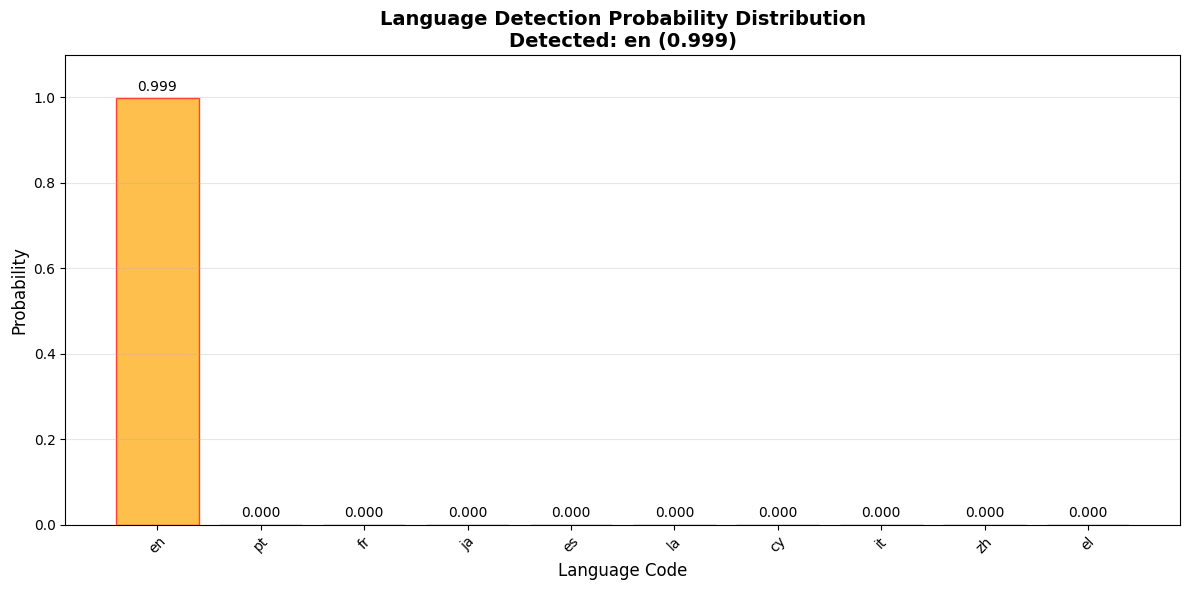

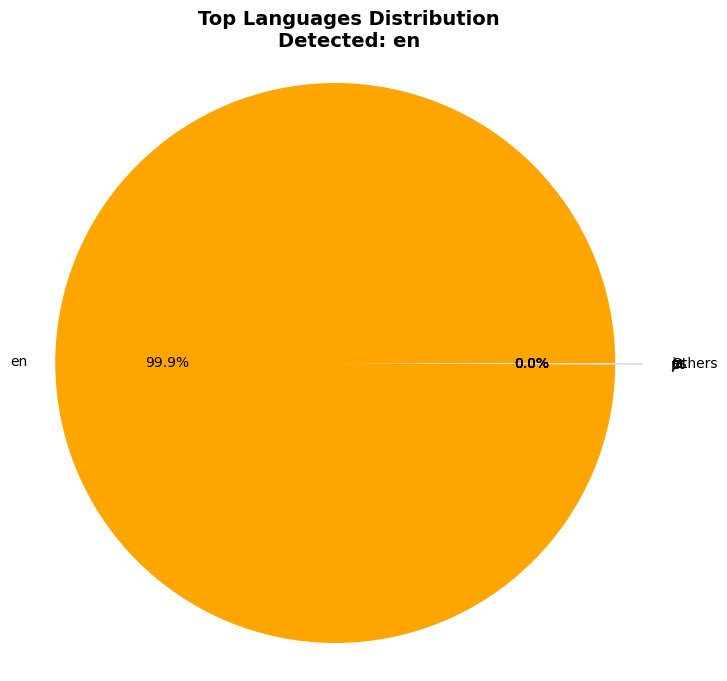

In [3]:
# Create probability distribution chart
import matplotlib.pyplot as plt
import numpy as np

# Sort probabilities in descending order
sorted_probs = sorted(all_probabilities.items(), key=lambda x: x[1], reverse=True)

# Take top 10 languages for better visualization
top_n = min(10, len(sorted_probs))
languages = [item[0] for item in sorted_probs[:top_n]]
probabilities = [item[1] for item in sorted_probs[:top_n]]

# Create the chart
plt.figure(figsize=(12, 6))
bars = plt.bar(languages, probabilities, color='skyblue', edgecolor='navy', alpha=0.7)

# Highlight the detected language
detected_idx = languages.index(language) if language in languages else -1
if detected_idx >= 0:
    bars[detected_idx].set_color('orange')
    bars[detected_idx].set_edgecolor('red')

plt.title(f'Language Detection Probability Distribution\nDetected: {language} ({probability:.3f})', 
          fontsize=14, fontweight='bold')
plt.xlabel('Language Code', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.ylim(0, max(probabilities) * 1.1)

# Add value labels on bars
for i, (lang, prob) in enumerate(zip(languages, probabilities)):
    plt.text(i, prob + max(probabilities) * 0.01, f'{prob:.3f}', 
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Also create a pie chart for top 5 languages
top_5_langs = languages[:5]
top_5_probs = probabilities[:5]
other_prob = sum(probabilities[5:]) if len(probabilities) > 5 else 0

if other_prob > 0:
    top_5_langs.append('Others')
    top_5_probs.append(other_prob)

plt.figure(figsize=(8, 8))
colors = ['orange' if lang == language else 'lightblue' for lang in top_5_langs]
if 'Others' in top_5_langs:
    colors[-1] = 'lightgray'

plt.pie(top_5_probs, labels=top_5_langs, autopct='%1.1f%%', 
        colors=colors, explode=[0.1 if lang == language else 0 for lang in top_5_langs])
plt.title(f'Top Languages Distribution\nDetected: {language}', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# Translation

In [4]:
from carlos_tools_AV import OpenAI_translate, local_whisper_translate

# file_path = "Audio.wav"

### Translation using OpenAI Whisper

Whisper treats transcription and translation as prompted decoding tasks, both starting from the same audio encoder output.

**Shared architecture:**

* **Input**: 30-second audio segment → encoded into latent representations.

* **Output**: A sequence of text tokens — either in the original language (transcription) or in English (translation).

The only thing that changes is the task token in the decoder prompt.

In [5]:
# Translate using OpenAI's Whisper-1 model - other OpenAI models do not support translation
# verbose_json response format --> translation output is TranslationVerbose object, which includes segments, which is a list of openai.types.audio.transcription_segment.TranscriptionSegment objects
model = "whisper-1"
response_format="verbose_json"
response = OpenAI_translate(
    file_path=file_path, 
    model=model,
    response_format=response_format,
    language="es",  
    )
text:str = response["text"]
language:str = response["language"]
translation:any = response["translation"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{translation=}")
print(f"translation type: {type(translation).__name__}")
index=model+"-translation-"+response_format
runs[index] = text
durations[index] = duration

# print segments - only available in verbose_json response format
if hasattr(translation, 'segments') and translation.segments:
    segments = translation.segments
    for segment in segments:
        print(f"[{segment.start:.2f}s -> {segment.end:.2f}s] {segment.text}")
else:
    print("No segments available in translation object")

duration = 7.32 seconds
text="Why Stripe? Well, the mission of increasing the GDP of the internet, and the key role Stripe plays for small companies in particular, really resonate with me. And here is why. The last several years have been all about big tech, right? Particularly the largest players, the Magnificent Seven. That's nice because I have some Nvidia shares. But in the long term, that kind of concentration of economic growth is not good for the country or the world. This is something Patrick and John Collison probably agree with because I saw them talking about that in a podcast. But I believe that we're entering a new era where AI will enable smaller companies and startups to compete more effectively and regain their key role in the economy. Stripe's role in providing these businesses with trust and access to enterprise-grade financial infrastructure will be critical in this new era. In other words, we need Stripe to ensure that the benefits of AI spread across the entire eco

**OpenAI whisper Output** The format of the ouput depends on response_format

if response_format= "text", "srt", "vtt" --> str


if response_format="json", None --> Translation object:
* text: str

if response_format="verbose_json" --> TranslationVerbose object

* duration: str - The duration of the input audio
* language: str - The language of the output translation (always 'english')
* text: str - The translated text.
* segments: List[TranscriptionSegment] - Segments of the translated text and their corresponding details

## Translation using open-source options
### Translation using local whisper

In [6]:
clear_GPU_cache()


GPU cache cleared.


In [7]:
# Translation using local whisper model
model = "local-whisper"
model_size = "large-v3"
response = local_whisper_translate(
    file_path=file_path, 
    model_size=model_size,
    device="cuda",
    verbose=False, # Set to True for segments printed as they are processed
    prompt="",
    language=None,  # if language is None, it will be detected automatically
    )
text:str = response["text"]
language:str = response["language"]
translation:any = response["translation"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{translation=}")
print(f"translation type: {type(translation).__name__}")
index=model+"-"+model_size+"-translation"
runs[index] = text
durations[index] = duration

# print segments - local models only
segments = translation["segments"]
print(f"segments type: {type(segments).__name__}")
print("segments:")
for segment in segments:
    print(f"[{segment["start"]:.2f}s -> {segment["end"]:.2f}s] {segment["text"]}")


Running whisper model locally. 
file_path='media/000-why-Stripe.mp3'
 model_size='large-v3'
 device='cuda'
 verbose=False
 prompt=''
 language=None

Detected language: English


100%|██████████| 17911/17911 [01:07<00:00, 264.30frames/s]

duration = 68.36 seconds
text=" why stripe well the mission of increasing the gdp of the internet and the key role stripe plays for small companies in particular really resonate with me and here is why the last several years have been all about big tech right particularly the largest players the magnificent seven that's nice because i have some nvidia shares but in the long term that kind of concentration of economic growth is not good for the country or the world this is something patrick and john collison probably agree with because i saw them talking about that in a podcast but i believe that we're entering a new era where ai will enable smaller companies and startups to compete more effectively and regain their key role in the economy stripe's role in providing these businesses with trust and access to enterprise-grade financial infrastructure will be critical in this new era in other words we need stripe to ensure that the benefits of ai spread across the entire account may not af

In [ ]:
clear_GPU_cache()

whisper-large-v3-turbo a.k.a. "turbo" was not trained for translation and does not support it well. We use medium here, which works fine. 

In [ ]:
# Translation using local whisper model
model = "local-whisper"
model_size = "medium"
response = local_whisper_translate(
    file_path=file_path, 
    model_size=model_size,
    device="cuda",
    verbose=False, # Set to True for segments printed as they are processed
    prompt="",
    language="es",  # if language provided, it will not be detected automatically
    )
text:str = response["text"]
language:str = response["language"]
translation:any = response["translation"]
duration:float = response["inference_time"]
print(f"duration = {duration:.2f} seconds")
print(f"{text=}")
print(f"{language=}")
print(f"{translation=}")
print(f"translation type: {type(translation).__name__}")
index=model+"-"+model_size+"-translation"
runs[index] = text
durations[index] = duration

# print segments - local models only
segments = translation["segments"]
print(f"segments type: {type(segments).__name__}")
print("segments:")
for segment in segments:
    print(f"[{segment["start"]:.2f}s -> {segment["end"]:.2f}s] {segment["text"]}")


In [ ]:
clear_GPU_cache()

### Translation using Faster Whisper

In [ ]:
# # Translation using local whisper model
# model = "local-faster-whisper"
# model_size = "large-v3"
# response = local_faster_whisper_translate(
#     file_path=file_path, 
#     model_size=model_size,
#     device="cuda",
#     language="es",
#     prompt="",
#     )
# text:str = response["text"]
# language:str = response["language"]
# translation:any = response["translation"]
# duration:float = response["inference_time"]
# print(f"duration = {duration:.2f} seconds")
# print(f"{text=}")
# print(f"{language=}")
# print(f"{translation=}")
# print(f"translation type: {type(translation).__name__}")
# index=model+"-"+model_size+"-translation"
# runs[index] = text
# durations[index] = duration

# # print segments - local models only
# segments = translation["segments"]
# print(f"segments type: {type(segments).__name__}")
# print("segments:")
# for segment in segments:
#     print(f"[{segment["start"]:.2f}s -> {segment["end"]:.2f}s] {segment["text"]}")

In [ ]:
def compare_transcriptions_char_diff(runs):
    """
    Character-by-character comparison for single-line transcriptions
    """
    import difflib
    from itertools import combinations
    
    # Show all transcriptions first
    for model, output in runs.items():
        print(f"Output from {model}:")
        print(f"  {output}")
        print(f"  Length: {len(output)} characters")
        print(f"  Duration: {durations[model]:.2f} seconds")
        print("-" * 40)
    
    # Show character-level differences
    models = list(runs.keys())
    print(f"\n🔍 CHARACTER-LEVEL COMPARISONS:")
    print("=" * 60)
    
    for model1, model2 in combinations(models, 2):
        print(f"\n📊 {model1} vs {model2}:",end="--")
        
        text1 = runs[model1]
        text2 = runs[model2]
        
        # Calculate similarity
        similarity = difflib.SequenceMatcher(None, text1, text2).ratio() * 100
        print(f"Similarity: {similarity:.1f}%")
        
        # if similarity < 100:
        #     # Show character-level differences
        #     matcher = difflib.SequenceMatcher(None, text1, text2)
            
        #     print("Differences:")
        #     for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        #         if tag == 'replace':
        #             print(f"  REPLACE pos {i1}-{i2}: '{text1[i1:i2]}' → '{text2[j1:j2]}'")
        #         elif tag == 'delete':
        #             print(f"  DELETE  pos {i1}-{i2}: '{text1[i1:i2]}'")
        #         elif tag == 'insert':
        #             print(f"  INSERT  pos {j1}-{j2}: '{text2[j1:j2]}'")
        # else:
        #     print("✅ Identical!")
        
        print("-" * 60)

compare_transcriptions_char_diff(runs)

In [ ]:
import pandas as pd


# Create a DataFrame
df = pd.DataFrame({
    "Model": list(runs.keys()),
    "Output": list(runs.values()),
    "Duration (s)": [durations[model] for model in runs.keys()]
})

# Display the table
print(df)


In [ ]:
from IPython.display import display

display(df)
